In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import zipfile
warnings.filterwarnings('ignore')

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("darrylljk/worlds-best-universities-qs-rankings-2025")

print("Path to dataset files:", path)

100%|██████████| 50.4k/50.4k [00:00<00:00, 20.8MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/darrylljk/worlds-best-universities-qs-rankings-2025/versions/1


In [ ]:
import os

# The path to the dataset files is stored in the 'path' variable from cell cK0l1IPN5_0p
print("Listing files in:", path)
for root, dirs, files in os.walk(path):
    for file in files:
        print(os.path.join(root, file))

Listing files in: /root/.cache/kagglehub/datasets/darrylljk/worlds-best-universities-qs-rankings-2025/versions/1
/root/.cache/kagglehub/datasets/darrylljk/worlds-best-universities-qs-rankings-2025/versions/1/qs-world-rankings-2025.csv


In [ ]:
csv_file_path = os.path.join(path, 'qs-world-rankings-2025.csv')

# Read the CSV file using the constructed path
df_main = pd.read_csv(csv_file_path)

In [ ]:
df = df_main.copy()

In [ ]:
# @title Varsayılan başlık metni
df.isnull().sum()

,0
2025 Rank,0
2024 Rank,21
Institution Name,0
Location,0
Location Full,0
Size,0
Academic Reputation,0
Employer Reputation,0
Faculty Student,0
Citations per Faculty,0


In [ ]:

def split_rank(X):
    if type(X) == str:
        if '-' in X:
            X = X.split('-')[0]
        if '+' in X:
            X = X.split('+')[0]
    return X

df['2025 Rank'] = df['2025 Rank'].apply(split_rank).astype(int)
df['2024 Rank'] = df['2024 Rank'].fillna('0').apply(split_rank).astype(int)

In [ ]:
df.head()

,2025 Rank,2024 Rank,Institution Name,Location,Location Full,Size,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,International Research Network,Employment Outcomes,Sustainability,QS Overall Score
0,1,1,Massachusetts Institute of Technology (MIT),US,United States,M,100.0,100.0,100.0,100.0,99.3,86.8,96.0,100.0,99.0,100
1,2,6,Imperial College London,UK,United Kingdom,L,98.5,99.5,98.2,93.9,100.0,99.6,97.4,93.4,99.7,98.5
2,3,3,University of Oxford,UK,United Kingdom,L,100.0,100.0,100.0,84.8,98.1,97.7,100.0,100.0,85.0,96.9
3,4,4,Harvard University,US,United States,L,100.0,100.0,96.3,100.0,74.1,69.0,99.6,100.0,84.4,96.8
4,5,2,University of Cambridge,UK,United Kingdom,L,100.0,100.0,100.0,84.6,100.0,94.8,99.3,100.0,84.8,96.7


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   2025 Rank                       1503 non-null   int64  
 1   2024 Rank                       1503 non-null   int64  
 2   Institution Name                1503 non-null   object 
 3   Location                        1503 non-null   object 
 4   Location Full                   1503 non-null   object 
 5   Size                            1503 non-null   object 
 6   Academic Reputation             1503 non-null   float64
 7   Employer Reputation             1503 non-null   float64
 8   Faculty Student                 1503 non-null   float64
 9   Citations per Faculty           1503 non-null   float64
 10  International Faculty           1403 non-null   float64
 11  International Students          1445 non-null   float64
 12  International Research Network  15

In [ ]:
df.describe()

,2025 Rank,2024 Rank,Academic Reputation,Employer Reputation,Faculty Student,Citations per Faculty,International Faculty,International Students,International Research Network,Employment Outcomes,Sustainability
count,1503.000000,1503.000000,1503.00000,1503.000000,1503.000000,1503.000000,1403.000000,1445.000000,1502.000000,1503.000000,1484.000000
mean,716.905522,698.625416,20.28656,19.786693,28.128676,23.503460,30.725374,25.580346,50.129095,23.825083,24.309299
std,399.080135,399.772918,22.32623,23.784986,27.613017,27.870692,34.328935,31.098689,29.866588,27.351315,31.074718
min,1.000000,0.000000,1.30000,1.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.200000,1.000000
25%,376.000000,354.500000,6.30000,4.300000,7.300000,2.800000,4.200000,2.900000,22.725000,4.000000,1.300000
50%,741.000000,731.000000,11.00000,9.400000,16.000000,9.900000,12.500000,9.600000,51.100000,11.800000,6.750000
75%,1001.000000,1001.000000,23.50000,25.300000,40.400000,36.400000,51.600000,38.300000,77.100000,33.400000,39.500000
max,1401.000000,1401.000000,100.00000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [ ]:
# Medyan değerleri (çünkü veriler sağa çarpık görünüyor)
fill_medians = {
    'International Faculty': 12.5,
    'International Students': 9.6
}

# Ortalama değer (tek eksik varsa çok fark etmez)
fill_means = {
    'International Research Network': 50.13,   # verilen mean
    'Sustainability': 24.31
}

# Eksik doldurma işlemi
df['International Faculty'] = df['International Faculty'].fillna(fill_medians['International Faculty'])
df['International Students'] = df['International Students'].fillna(fill_medians['International Students'])
df['International Research Network'] = df['International Research Network'].fillna(fill_means['International Research Network'])
df['Sustainability'] = df['Sustainability'].fillna(fill_means['Sustainability'])


In [ ]:
df.isnull().sum()

,0
2025 Rank,0
2024 Rank,0
Institution Name,0
Location,0
Location Full,0
Size,0
Academic Reputation,0
Employer Reputation,0
Faculty Student,0
Citations per Faculty,0


In [ ]:
df["Location"].unique()

array(['US', 'UK', 'CH', 'SG', 'AU', 'CN', 'HK', 'FR', 'CA', 'DE', 'KR',
       'JP', 'NL', 'MY', 'BE', 'NZ', 'TW', 'AR', 'SE', 'IE', 'BR', 'CL',
       'RU', 'MX', 'DK', 'SA', 'IT', 'FI', 'IN', 'NO', 'QA', 'AT', 'KZ',
       'ES', 'ZA', 'CO', 'AE', 'ID', 'IL', 'TH', 'MO', 'CZ', 'LB', 'PL',
       'PT', 'TR', 'PK', 'GR', 'PH', 'IR', 'EG', 'LU', 'EE', 'PE', 'OM',
       'JO', 'BN', 'BY', 'CY', 'LT', 'VN', 'CR', 'BH', 'UZ', 'IS', 'BD',
       'HU', 'SI', 'KW', 'NCY', 'HR', 'SK', 'BG', 'UY', 'VE', 'CU', 'UA',
       'LV', 'RS', 'MT', 'ET', 'TN', 'RO', 'GE', 'EC', 'IQ', 'PS', 'KG',
       'GH', 'UG', 'KE', 'AM', 'AZ', 'LK', 'PR', 'PY', 'PA', 'MA', 'NG',
       'SD', 'BA', 'SY', 'DO', 'GT', 'BO', 'HN'], dtype=object)

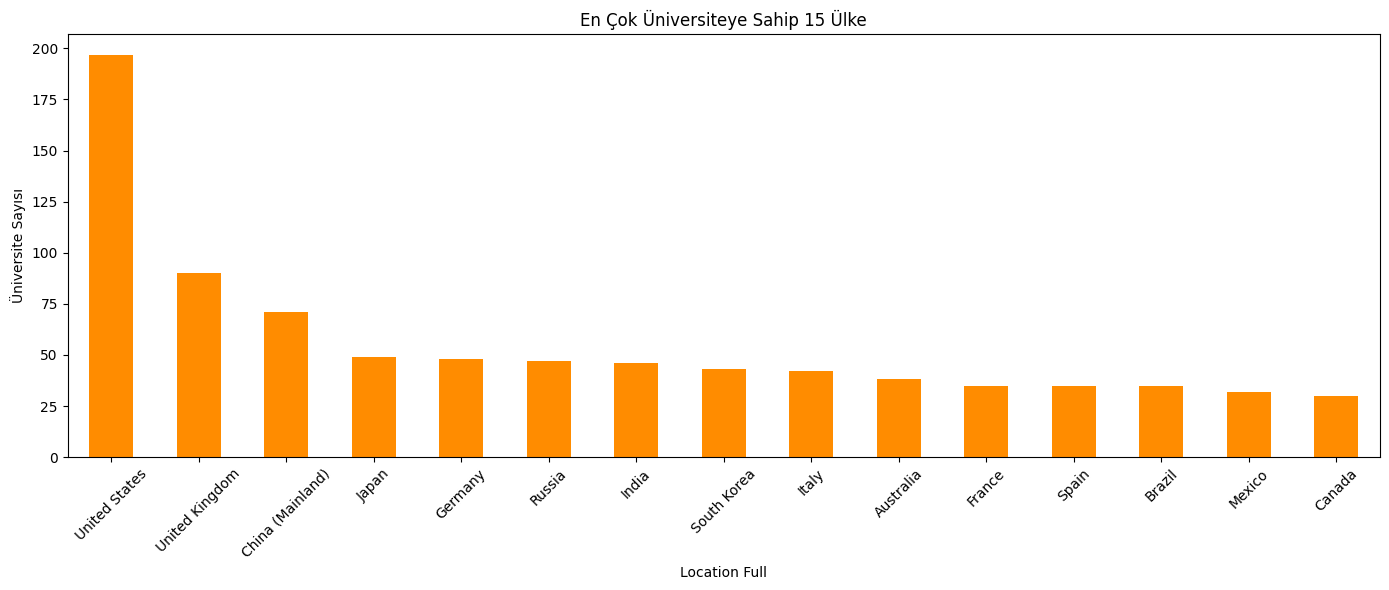

In [ ]:
#Ülkelere göre üniversite dağılımı
plt.figure(figsize=(14, 6))
df['Location Full'].value_counts().head(15).plot(kind='bar', color='darkorange')
plt.title("En Çok Üniversiteye Sahip 15 Ülke")
plt.ylabel("Üniversite Sayısı")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

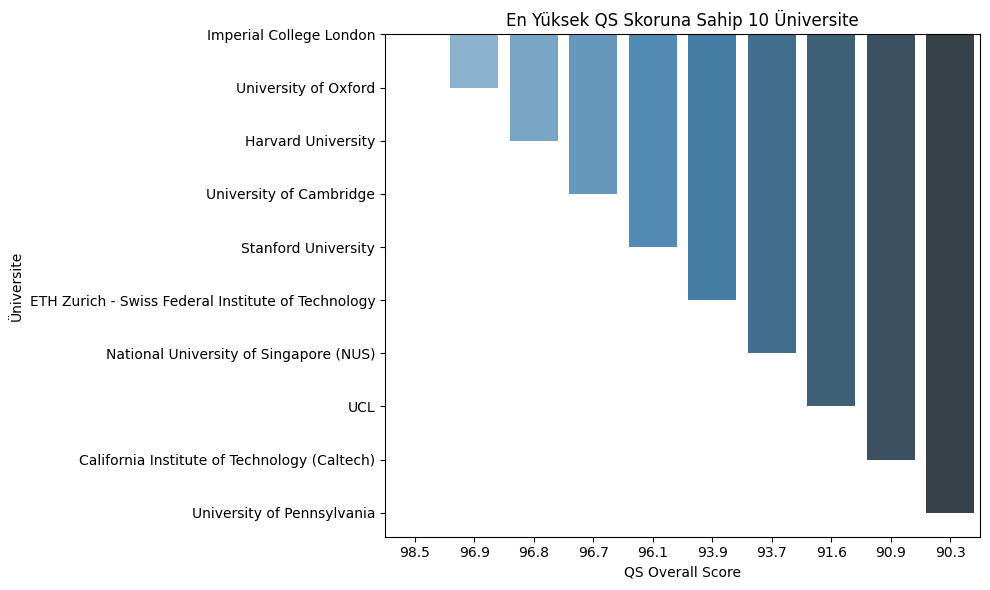

In [ ]:
# QS Overall Score üzerinden sıralama
top_10 = df.sort_values('QS Overall Score', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_10, y='Institution Name', x='QS Overall Score', palette='Blues_d')
plt.title("En Yüksek QS Skoruna Sahip 10 Üniversite")
plt.xlabel("QS Overall Score")
plt.ylabel("Üniversite")
plt.tight_layout()
plt.show()


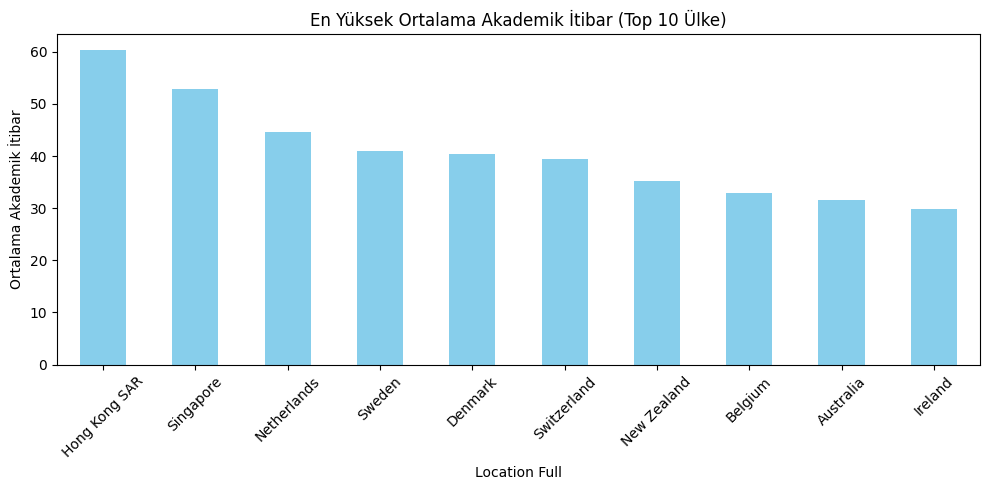

In [ ]:
# Ortalama akademik itibar (ilk 10 ülke)
top_acad = df.groupby("Location Full")["Academic Reputation"].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
top_acad.plot(kind='bar', color='skyblue')
plt.title("En Yüksek Ortalama Akademik İtibar (Top 10 Ülke)")
plt.ylabel("Ortalama Akademik İtibar")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


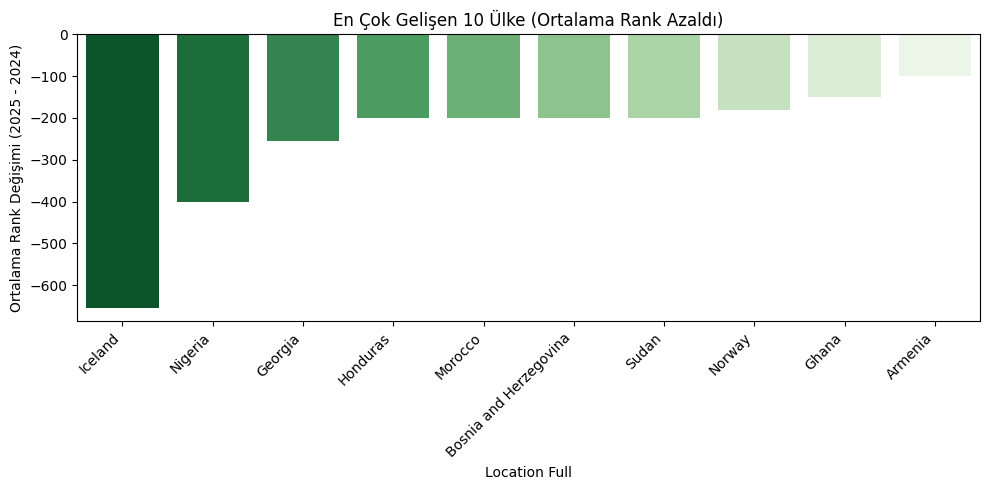

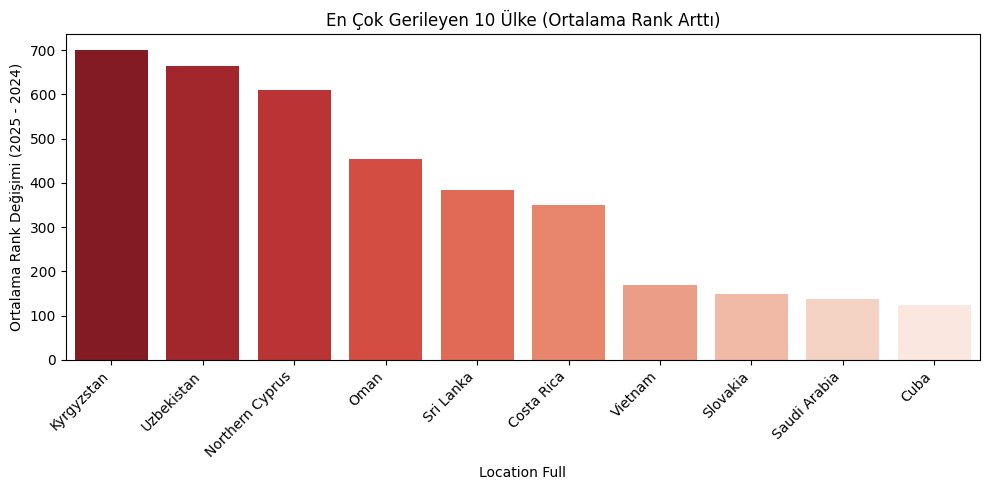

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. clean_rank fonksiyonunu NaN check ile güncelleyelim ---
def clean_rank(rank):
    # Eğer değer zaten NaN ise aynı NaN’i döndür
    if pd.isna(rank):
        return np.nan

    # String içindeyse =, aralık veya + işaretlerini temizle
    s = str(rank)
    if '-' in s:
        s = s.split('-')[0]
    if '+' in s:
        s = s.split('+')[0]

    # Şimdi güvenle int’e çevir (başarısızsa NaN döndür)
    try:
        return int(s)
    except ValueError:
        return np.nan

# --- 2. Hem 2024 hem 2025 sütunlarına uygula ---
df['2024 Rank'] = df['2024 Rank'].apply(clean_rank)
df['2025 Rank'] = df['2025 Rank'].apply(clean_rank)

# (isteğe bağlı) Sadece her iki yıl için de değer olanları saklamak:
df = df.dropna(subset=['2024 Rank','2025 Rank'])

# --- 3. Ülke bazında ortalama rank’ları hesapla ---
country_rank_change = (
    df
    .groupby('Location Full')[['2024 Rank','2025 Rank']]
    .mean()
)

# --- 4. Değişim sütunu ekle (pozitif = gerileme, negatif = gelişme) ---
country_rank_change['Rank Change'] = (
    country_rank_change['2025 Rank']
    - country_rank_change['2024 Rank']
)

# --- 5. En çok gelişen & gerileyen 10 ülke ---
improved = country_rank_change.sort_values('Rank Change').head(10)
declined = country_rank_change.sort_values('Rank Change', ascending=False).head(10)

# --- 6. Görselleştirme ---
plt.figure(figsize=(10,5))
sns.barplot(x=improved.index, y=improved['Rank Change'], palette='Greens_r')
plt.title("En Çok Gelişen 10 Ülke (Ortalama Rank Azaldı)")
plt.ylabel("Ortalama Rank Değişimi (2025 - 2024)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(x=declined.index, y=declined['Rank Change'], palette='Reds_r')
plt.title("En Çok Gerileyen 10 Ülke (Ortalama Rank Arttı)")
plt.ylabel("Ortalama Rank Değişimi (2025 - 2024)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

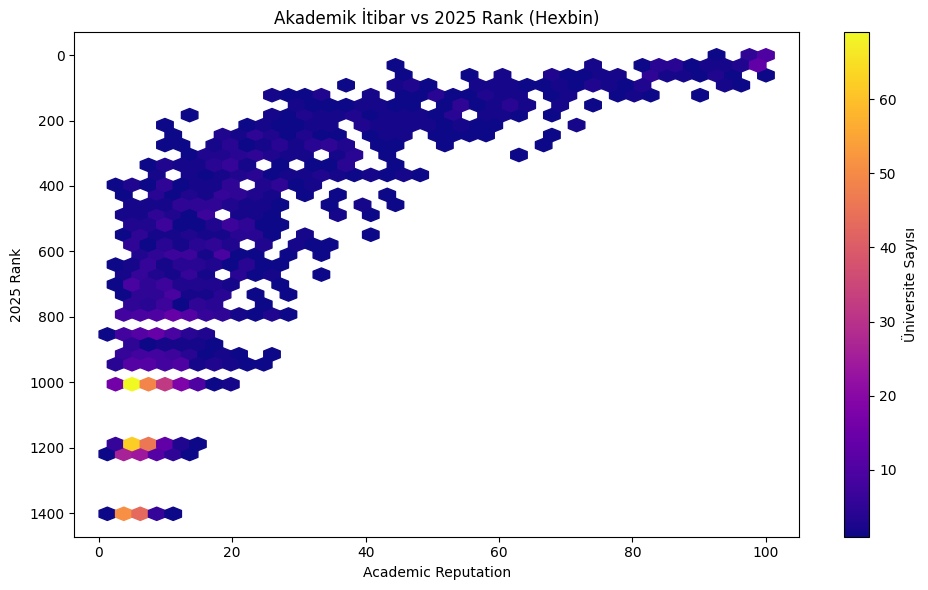

In [ ]:
# Rank vs Akademik İtibar
plt.figure(figsize=(10, 6))
plt.hexbin(df['Academic Reputation'], df['2025 Rank'], gridsize=40, cmap='plasma', mincnt=1)
plt.colorbar(label='Üniversite Sayısı')
plt.title("Akademik İtibar vs 2025 Rank (Hexbin)")
plt.xlabel("Academic Reputation")
plt.ylabel("2025 Rank")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

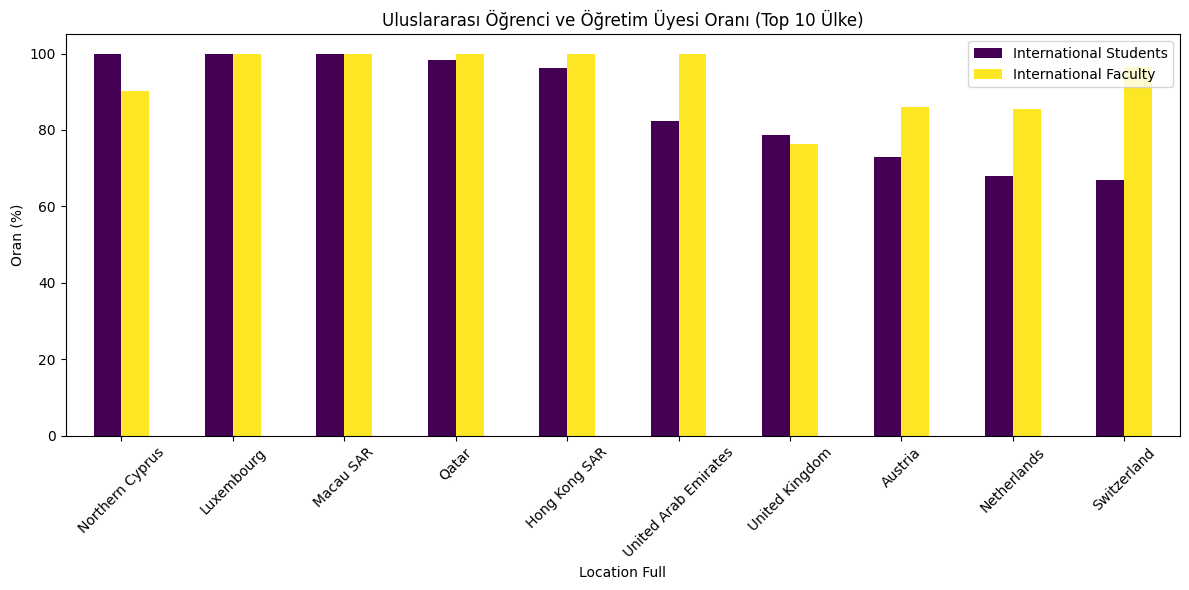

In [ ]:
intl_avg = df.groupby('Location Full')[['International Students', 'International Faculty']].mean()
intl_top = intl_avg.sort_values(by='International Students', ascending=False).head(10)
intl_top.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title("Uluslararası Öğrenci ve Öğretim Üyesi Oranı (Top 10 Ülke)")
plt.ylabel("Oran (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import zscore # Assuming zscore is needed elsewhere, otherwise remove

# 1. 🔬 Faktör Etkisi Analizi: Hangi özellik QS Overall Score'u en çok etkiliyor?
def faktor_etkisi_analizi(df):
    features = [
        'Academic Reputation', 'Employer Reputation', 'Faculty Student',
        'Citations per Faculty', 'International Faculty', 'International Students',
        'International Research Network', 'Employment Outcomes', 'Sustainability'
    ]

    # Ensure target variable is numeric and handle potential non-numeric values
    # Convert to numeric, coercing errors to NaN
    df['QS Overall Score'] = pd.to_numeric(df['QS Overall Score'], errors='coerce')

    # Drop rows where the target variable is NaN, as Linear Regression cannot handle them
    df_cleaned = df.dropna(subset=['QS Overall Score'] + features) # Drop rows with NaN in features or target

    if df_cleaned.empty:
        print("Uyarı: Faktör analizi için uygun veri kalmadı.")
        return pd.DataFrame({'Feature': features, 'Coefficient': [np.nan]*len(features)}) # Return empty or NaN dataframe

    X = df_cleaned[features]
    y = df_cleaned['QS Overall Score']

    model = LinearRegression()
    model.fit(X, y)

    return pd.DataFrame({'Feature': features, 'Coefficient': model.coef_}).sort_values('Coefficient', ascending=False)

# 2. 🌍 Bölgesel Başarı Kıyaslaması: Gelişmiş vs Gelişmekte olan ülkeler
def bolgesel_karsilastirma(df):
    developed = ['United States', 'United Kingdom', 'Germany', 'Canada', 'France', 'Australia', 'Japan']
    # Create a copy to avoid SettingWithCopyWarning when adding 'Development Level'
    df_copy = df.copy()
    df_copy['Development Level'] = df_copy['Location Full'].apply(lambda x: 'Developed' if x in developed else 'Developing')
    return df_copy[['Location Full', 'QS Overall Score', 'Development Level']]

# 3. 🌐 Uluslararasılaşma Etkisi: Öğrenci ve öğretim üyesi oranı arttıkça başarı artıyor mu?
def uluslararasilik_etkisi(df):
    return df[['International Students', 'International Faculty', 'QS Overall Score']]

# 4. ⚠️ Outlier (Sıra dışı okul) tespiti: Z-score toplamı 12'den büyük olanlar
def outlier_tespiti(df):
    num_cols = [
        'Academic Reputation', 'Employer Reputation', 'Faculty Student',
        'Citations per Faculty', 'International Faculty', 'International Students',
        'International Research Network', 'Employment Outcomes', 'Sustainability', 'QS Overall Score'
    ]
    # Ensure QS Overall Score is numeric before calculating z-scores
    df['QS Overall Score'] = pd.to_numeric(df['QS Overall Score'], errors='coerce')

    # Drop rows with NaN in any required column before calculating z-scores
    df_cleaned = df.dropna(subset=num_cols)

    if df_cleaned.empty:
        print("Uyarı: Outlier tespiti için uygun veri kalmadı.")
        return pd.DataFrame(columns=['Institution Name', 'QS Overall Score', 'Outlier Score']) # Return empty dataframe

    df_z = df_cleaned[num_cols].apply(zscore)
    df_cleaned['Outlier Score'] = df_z.sum(axis=1)
    return df_cleaned.loc[df_cleaned['Outlier Score'].abs() > 12, ['Institution Name', 'QS Overall Score', 'Outlier Score']]


# 5. 🧩 Kümelere Ayırma (K-Means): Üniversiteleri benzerliklerine göre gruplandır
def kumeleme(df, n_clusters=4):
    features = [
        'Academic Reputation', 'Employer Reputation', 'Faculty Student',
        'Citations per Faculty', 'International Faculty', 'International Students',
        'International Research Network', 'Employment Outcomes', 'Sustainability'
    ]
    # Drop rows with NaN in any required column before scaling and clustering
    df_cleaned = df.dropna(subset=features)

    if df_cleaned.empty:
         print("Uyarı: Kümeleme için uygun veri kalmadı.")
         # Return a dataframe with the original index and a NaN cluster column
         df_with_cluster = df.copy()
         df_with_cluster['Cluster'] = np.nan
         return df_with_cluster[['Institution Name', 'Location Full', 'QS Overall Score', 'Cluster']]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_cleaned[features])

    # Handle cases where n_clusters might be greater than the number of samples after dropping NaNs
    if n_clusters > len(df_cleaned):
        print(f"Uyarı: Küme sayısı ({n_clusters}), veri noktası sayısından ({len(df_cleaned)}) fazla. Küme sayısı veri noktası sayısına eşitlendi.")
        n_clusters = len(df_cleaned)
        if n_clusters == 0:
             print("Uyarı: Kümeleme için uygun veri kalmadı.")
             df_with_cluster = df.copy()
             df_with_cluster['Cluster'] = np.nan
             return df_with_cluster[['Institution Name', 'Location Full', 'QS Overall Score', 'Cluster']]


    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # Added n_init for KMeans warning
    df_cleaned['Cluster'] = kmeans.fit_predict(X_scaled)

    # Merge the cluster results back to the original dataframe based on index
    df_with_cluster = df.copy()
    df_with_cluster['Cluster'] = np.nan # Initialize with NaN
    df_with_cluster.loc[df_cleaned.index, 'Cluster'] = df_cleaned['Cluster']


    return df_with_cluster[['Institution Name', 'Location Full', 'QS Overall Score', 'Cluster']]

# Hepsini hazırla
# Ensure df is clean before passing to functions that expect numeric types
df['QS Overall Score'] = pd.to_numeric(df['QS Overall Score'], errors='coerce')
# Fill or drop NaNs if needed for other functions, depending on desired behavior
# For simplicity and to avoid errors, dropping NaNs in relevant columns before analysis is recommended.
# You might want to apply fillna *before* calling these analysis functions if imputation is desired.
# As shown within the functions now, dropping NaNs is handled internally for each specific analysis requiring it.

faktor_etki = faktor_etkisi_analizi(df.copy()) # Pass a copy to avoid modifying the original df in place unexpectedly
bolgesel_karsilasma = bolgesel_karsilastirma(df.copy()) # Pass a copy
uluslararasilik = uluslararasilik_etkisi(df.copy()) # Pass a copy
outliers = outlier_tespiti(df.copy()) # Pass a copy
kume_sonuclari = kumeleme(df.copy()) # Pass a copy

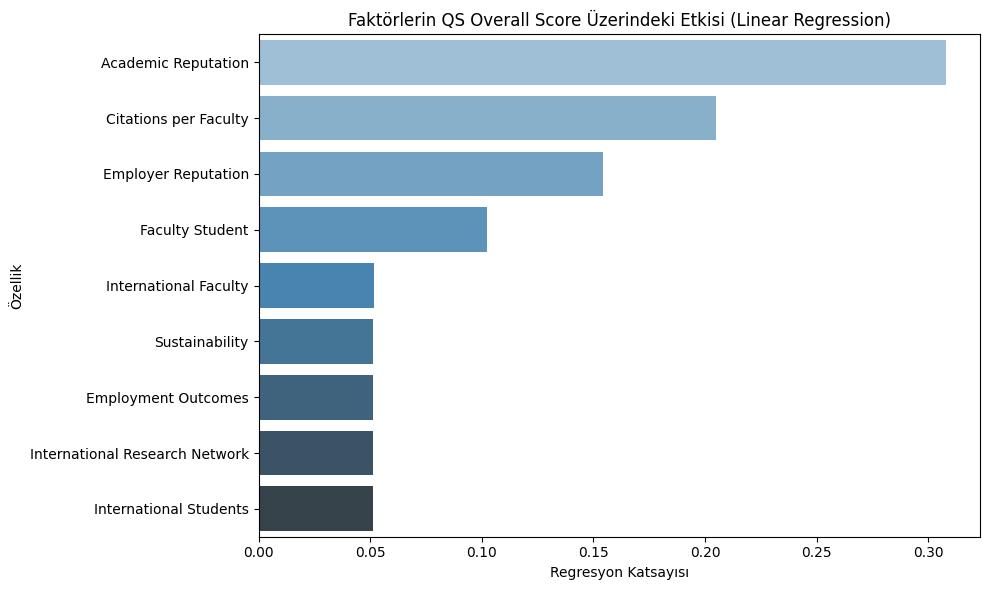

In [ ]:
# 1. Faktör Etkisi: Barplot ile Görselleştirme
plt.figure(figsize=(10, 6))
sns.barplot(data=faktor_etki, x='Coefficient', y='Feature', palette='Blues_d')
plt.title("Faktörlerin QS Overall Score Üzerindeki Etkisi (Linear Regression)")
plt.xlabel("Regresyon Katsayısı")
plt.ylabel("Özellik")
plt.tight_layout()
plt.show()


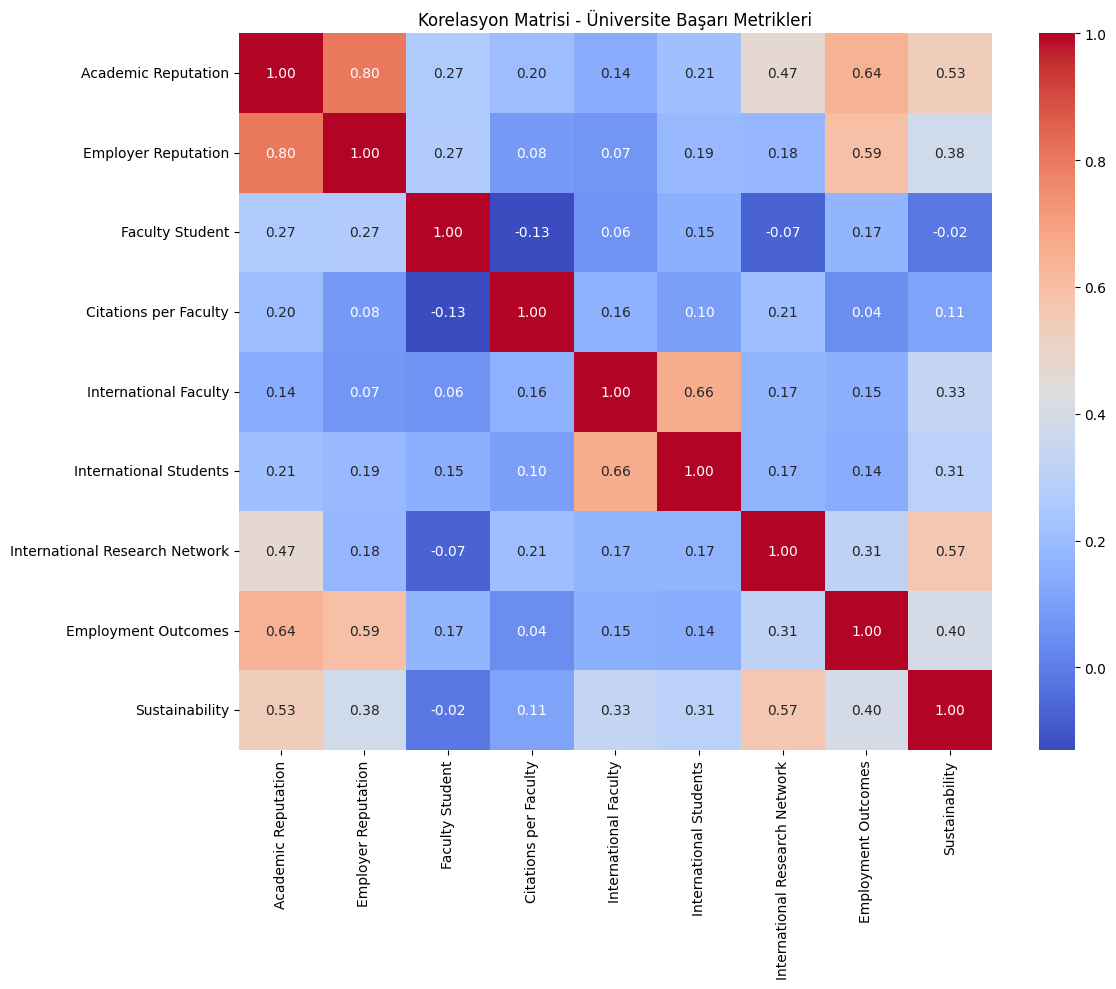

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

num_cols = [
    'Academic Reputation', 'Employer Reputation', 'Faculty Student',
    'Citations per Faculty', 'International Faculty', 'International Students',
    'International Research Network', 'Employment Outcomes', 'Sustainability'
]

# Korelasyon matrisi
corr = df[num_cols].corr()

# Görselleştirme
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Korelasyon Matrisi - Üniversite Başarı Metrikleri")
plt.tight_layout()
plt.show()

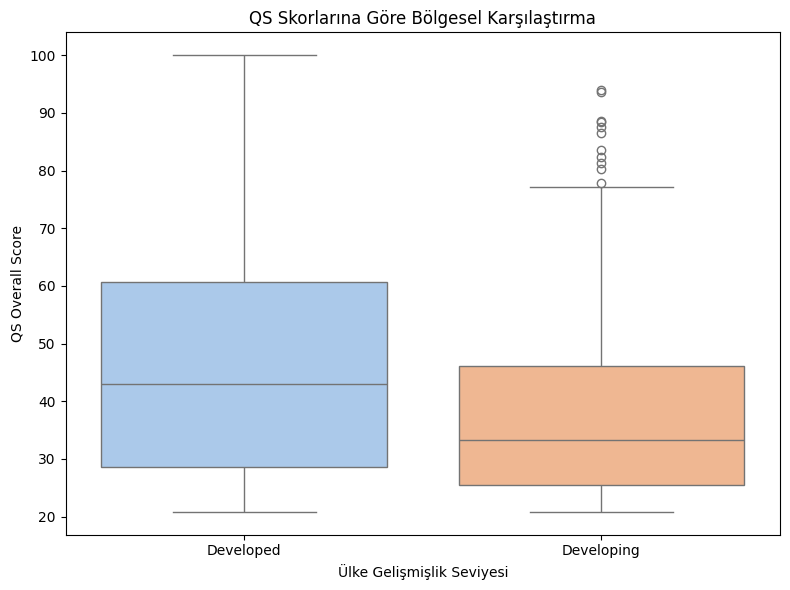

In [ ]:
#Bölgesel Karşılaştırma: Boxplot ile Gelişmiş vs Gelişmekte Olan
plt.figure(figsize=(8, 6))
sns.boxplot(data=bolgesel_karsilasma, x='Development Level', y='QS Overall Score', palette='pastel')
plt.title("QS Skorlarına Göre Bölgesel Karşılaştırma")
plt.ylabel("QS Overall Score")
plt.xlabel("Ülke Gelişmişlik Seviyesi")
plt.tight_layout()
plt.show()


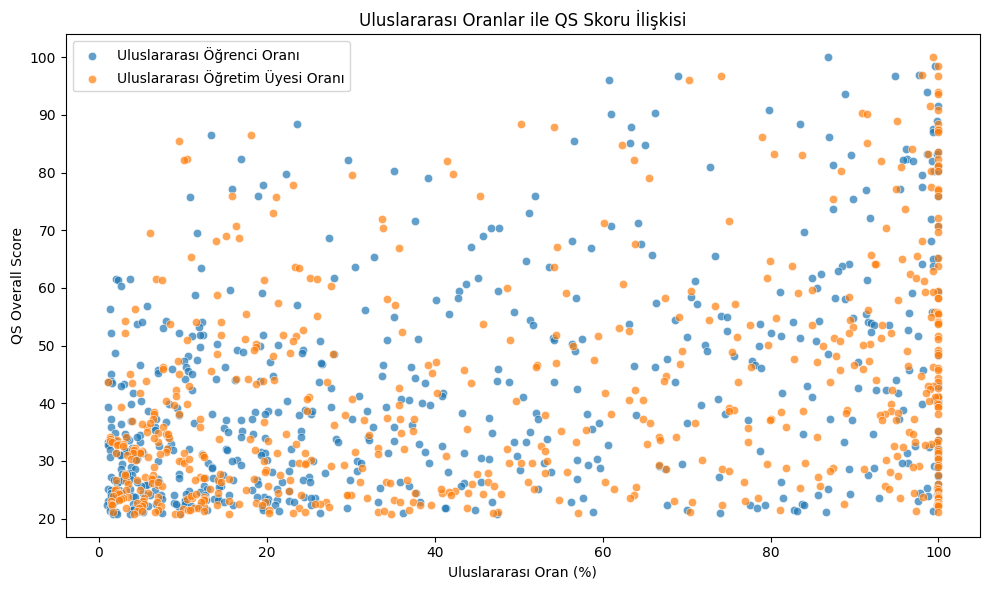

In [ ]:
# 3. Uluslararası Öğrenci ve Fakülte Oranı vs QS Score: Scatter
plt.figure(figsize=(10, 6))
sns.scatterplot(data=uluslararasilik, x='International Students', y='QS Overall Score', label='Uluslararası Öğrenci Oranı', alpha=0.7)
sns.scatterplot(data=uluslararasilik, x='International Faculty', y='QS Overall Score', label='Uluslararası Öğretim Üyesi Oranı', alpha=0.7)
plt.title("Uluslararası Oranlar ile QS Skoru İlişkisi")
plt.xlabel("Uluslararası Oran (%)")
plt.ylabel("QS Overall Score")
plt.legend()
plt.tight_layout()
plt.show()

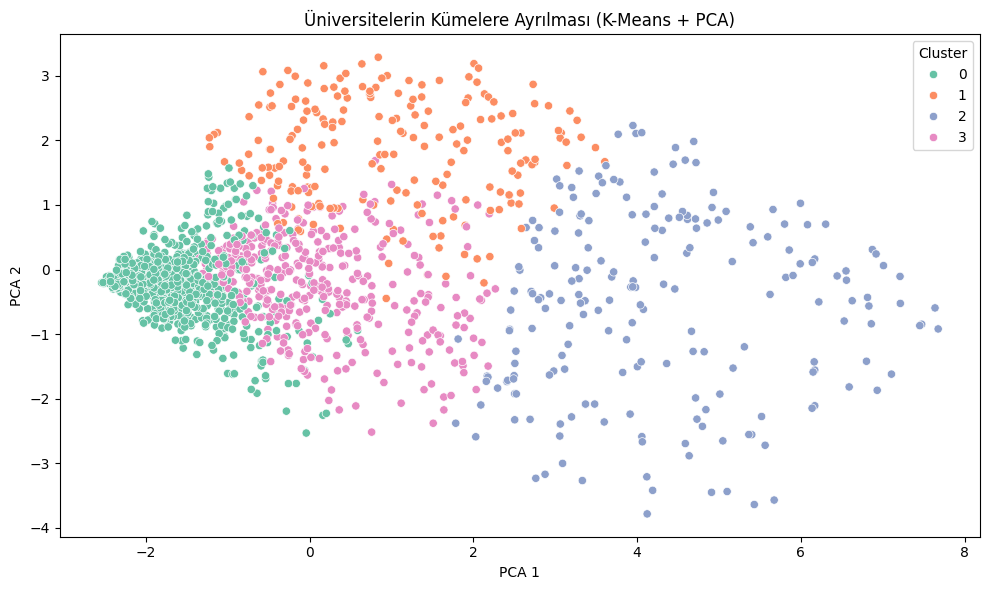

In [ ]:
# 5. 🧩 Kümeleme Sonuçları: PCA ile 2D Gösterim

# Features used for clustering and PCA
features = [
    'Academic Reputation', 'Employer Reputation', 'Faculty Student',
    'Citations per Faculty', 'International Faculty', 'International Students',
    'International Research Network', 'Employment Outcomes', 'Sustainability'
]

# Ensure QS Overall Score is numeric before any potential filtering/dropping
df['QS Overall Score'] = pd.to_numeric(df['QS Overall Score'], errors='coerce')

# Clean the DataFrame by dropping rows with NaN in features BEFORE scaling/PCA/clustering
# This ensures that the data used for scaling, PCA, and clustering are consistent.
df_cleaned_for_clustering = df.dropna(subset=features)

if df_cleaned_for_clustering.empty:
     print("Uyarı: Kümeleme ve PCA için uygun veri kalmadı.")
else:
    # Scale the cleaned data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(df_cleaned_for_clustering[features])

    # Apply PCA to the scaled data
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)

    # Perform clustering on the scaled data
    # Use the cleaned data index to assign clusters
    n_clusters = 4 # Define your number of clusters
    if n_clusters > len(X_scaled):
        print(f"Uyarı: Küme sayısı ({n_clusters}), veri noktası sayısından ({len(X_scaled)}) fazla. Küme sayısı veri noktası sayısına eşitlendi.")
        n_clusters = len(X_scaled)
        if n_clusters == 0:
            print("Uyarı: Kümeleme için uygun veri kalmadı.")
        else:
             kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
             df_cleaned_for_clustering['Cluster'] = kmeans.fit_predict(X_scaled)
             # Plotting: Use the PCA components and the Cluster column from the cleaned DataFrame
             plt.figure(figsize=(10, 6))
             # Use X_pca directly for coordinates and the 'Cluster' column from the *cleaned* dataframe
             sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_cleaned_for_clustering['Cluster'], palette='Set2')
             plt.title("Üniversitelerin Kümelere Ayrılması (K-Means + PCA)")
             plt.xlabel("PCA 1")
             plt.ylabel("PCA 2")
             plt.tight_layout()
             plt.show()
    else:
         kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
         df_cleaned_for_clustering['Cluster'] = kmeans.fit_predict(X_scaled)

         # Plotting: Use the PCA components and the Cluster column from the cleaned DataFrame
         plt.figure(figsize=(10, 6))
         # Use X_pca directly for coordinates and the 'Cluster' column from the *cleaned* dataframe
         sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=df_cleaned_for_clustering['Cluster'], palette='Set2')
         plt.title("Üniversitelerin Kümelere Ayrılması (K-Means + PCA)")
         plt.xlabel("PCA 1")
         plt.ylabel("PCA 2")
         plt.tight_layout()
         plt.show()


# Note: The original `kumeleme` function might still be useful if you need the clusters merged back onto the full original DataFrame,
# but for the PCA plot, it's crucial that the PCA data (X_pca) aligns exactly with the cluster labels (df['Cluster']).
# Performing the cleaning, scaling, PCA, and clustering within the same block ensures this alignment.

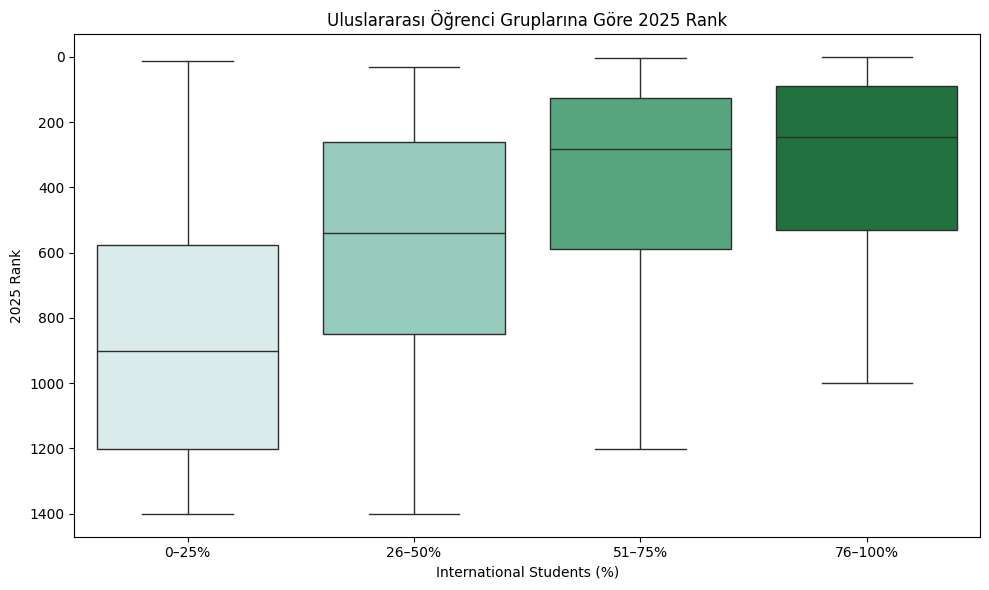

In [ ]:
#Uluslararası öğrenci oranı vs sıralama

df['International Group'] = pd.cut(df['International Students'], bins=[0, 25, 50, 75, 100], labels=['0–25%', '26–50%', '51–75%', '76–100%'])

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='International Group', y='2025 Rank', palette='BuGn')
plt.title("Uluslararası Öğrenci Gruplarına Göre 2025 Rank")
plt.xlabel("International Students (%)")
plt.ylabel("2025 Rank")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


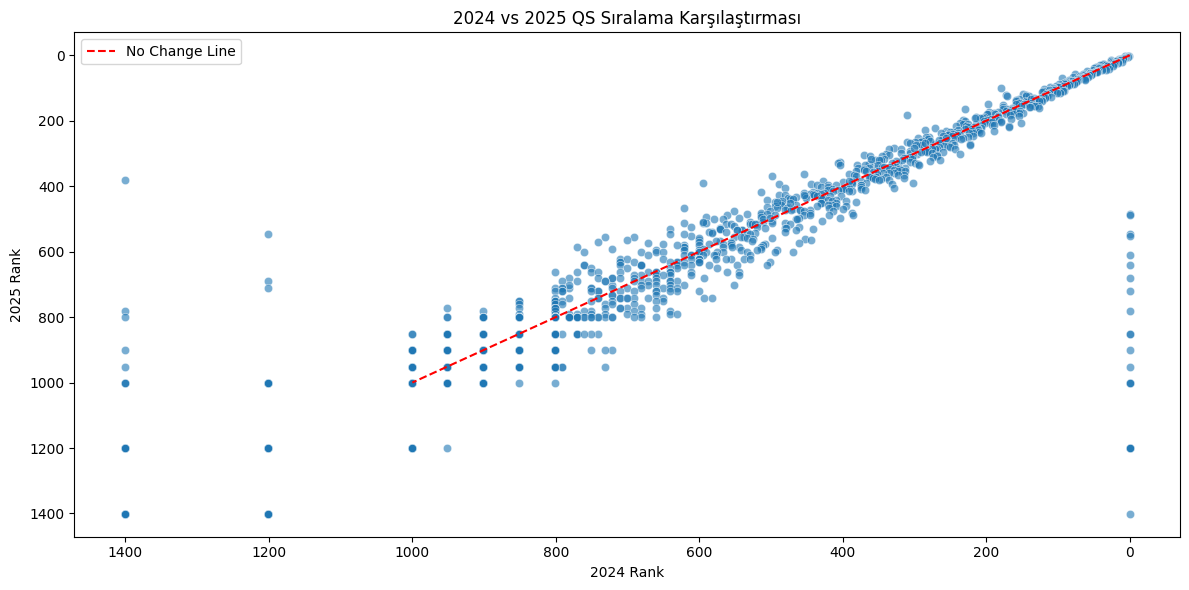

In [ ]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='2024 Rank', y='2025 Rank', alpha=0.6)
plt.plot([0, 1000], [0, 1000], color='red', linestyle='--', label="No Change Line")
plt.xlabel("2024 Rank")
plt.ylabel("2025 Rank")
plt.title("2024 vs 2025 QS Sıralama Karşılaştırması")
plt.legend()
plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()


In [ ]:
#United States üniversite sayısı
df[df['Location Full'] == 'United States']['QS Overall Score'].count()

np.int64(84)

In [ ]:
df.groupby('Location Full')['International Students'].mean()
df.groupby('Location Full')['International Faculty'].mean()
df.groupby('Location Full')['Sustainability'].mean()
df.groupby('Location Full')['Employment Outcomes'].mean().sort_values(ascending=False)
df.groupby('Location Full')['Academic Reputation'].mean().sort_values(ascending=False)
df.groupby('Location Full')['Employer Reputation'].mean().sort_values()
df.groupby('Location Full')['Citations per Faculty'].mean()
df.groupby('Location Full')['International Research Network'].mean().sort_values(ascending=False)


,International Research Network
Location Full,
Denmark,91.120000
South Africa,89.663636
Sweden,89.250000
Netherlands,87.576923
Belgium,85.777778
...,...
Azerbaijan,9.300000
Kazakhstan,8.261905
Panama,6.950000


In [ ]:
df.shape

(1503, 17)

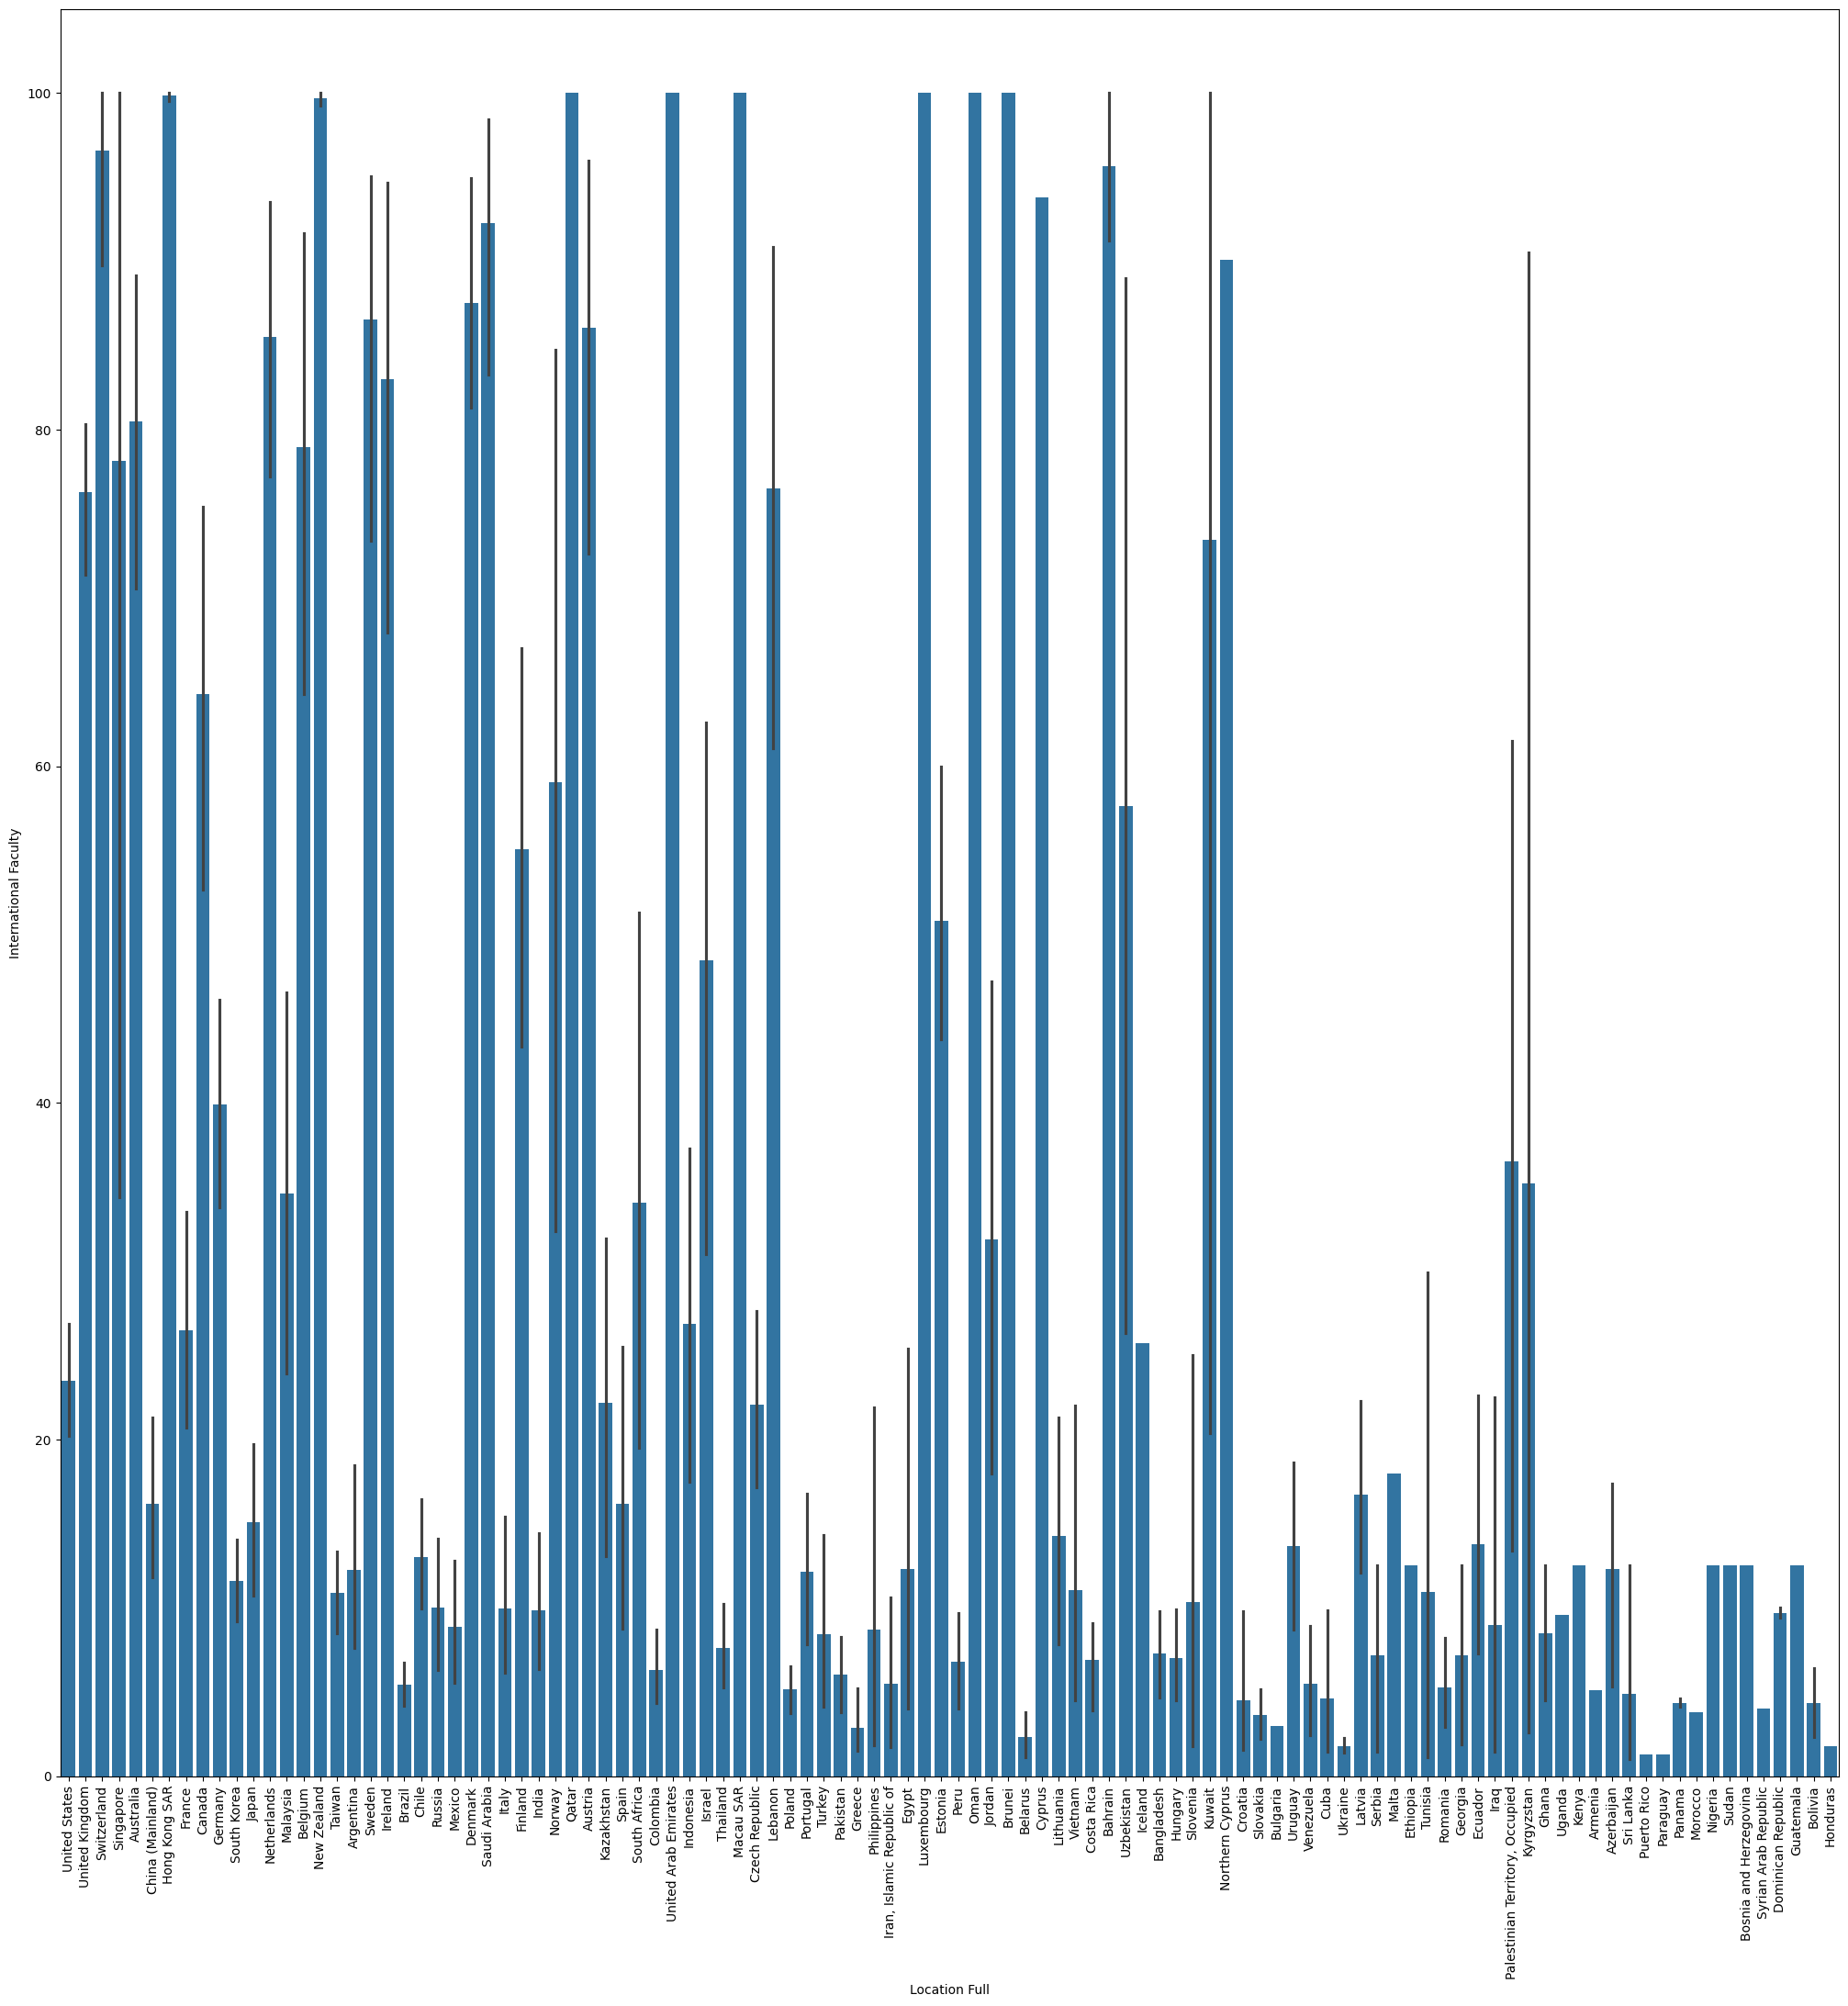

In [ ]:
plt.figure(figsize=(25,25))
sns.barplot(x='Location Full', y='International Faculty', data=df)
plt.xticks(rotation=90)
plt.show()

In [ ]:
#aykırı verileri işaretleme:
import pandas as pd

# 1) 'QS Overall Score' sütununu kesinlikle numeric hale getirelim
df['QS Overall Score'] = pd.to_numeric(
    df['QS Overall Score'],
    errors='coerce'        # dönüşemeyenleri NaN yap
)

# 2) NaN'leri at (aksi halde quantile da NaN ile uğraşmak zorunda kalır)
df = df.dropna(subset=['QS Overall Score'])
Q1: float = df['QS Overall Score'].quantile(0.25)
Q3: float = df['QS Overall Score'].quantile(0.75)

IQR = Q3 - Q1

outliers = df[
    (df['QS Overall Score'] <  Q1 - 1.5 * IQR) |
    (df['QS Overall Score'] >  Q3 + 1.5 * IQR)
]

print(outliers[['Institution Name', 'QS Overall Score']])

                                    Institution Name  QS Overall Score
0       Massachusetts Institute of Technology (MIT)              100.0
1                            Imperial College London              98.5
2                               University of Oxford              96.9
3                                 Harvard University              96.8
4                            University of Cambridge              96.7
5                                Stanford University              96.1
6  ETH Zurich - Swiss Federal Institute of Techno...              93.9
7             National University of Singapore (NUS)              93.7
8                                                UCL              91.6
9       California Institute of Technology (Caltech)              90.9


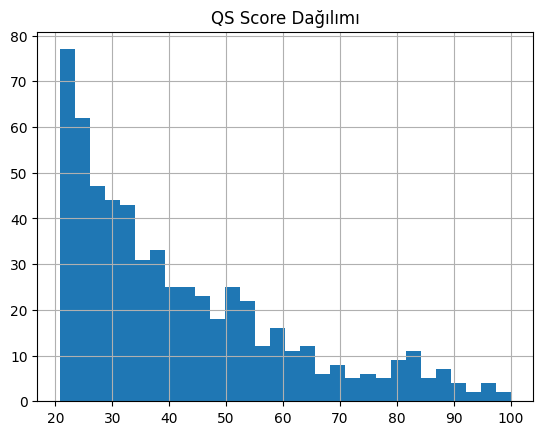

In [ ]:
#Histogram ile puan ve oran sütunlarının frekans dağılımı:
df['QS Overall Score'].hist(bins=30)
plt.title('QS Score Dağılımı'); plt.show()

In [ ]:
# Rank'i 0–50, 51–100, 101–200, 200+ diye kategorize edelim
bins = [0, 50, 100, 200, df['2025 Rank'].max()]
labels = ['Top 50','51-100','101-200','200+']
df['Rank_Tier'] = pd.cut(df['2025 Rank'], bins=bins, labels=labels, right=True)

In [ ]:
# Her Rank_Tier için ortalama QS Score
mean_scores_by_tier = df.groupby('Rank_Tier')['QS Overall Score'].mean()
print(mean_scores_by_tier)

# Ülke + Tier kırılımında ortalama Academic Reputation
pivot = df.pivot_table(
    index='Location Full',
    columns='Rank_Tier',
    values='Academic Reputation',
    aggfunc='mean'
)
print(pivot.head())

Rank_Tier
Top 50     85.123077
51-100     66.204167
101-200    52.344554
200+       30.605514
Name: QS Overall Score, dtype: float64
Rank_Tier         Top 50  51-100    101-200       200+
Location Full                                         
Argentina            NaN    94.1        NaN  27.200000
Australia      92.516667    51.8  32.666667  15.418750
Austria              NaN     NaN  52.400000  15.933333
Bahrain              NaN     NaN        NaN  23.500000
Bangladesh           NaN     NaN        NaN  23.000000


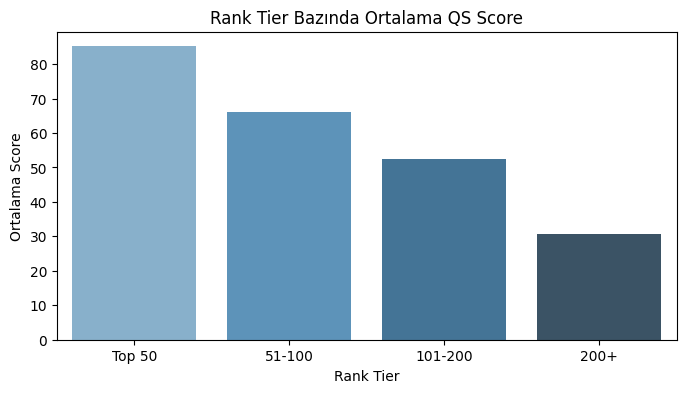

In [ ]:
#barplot ile Ortalama Değerlerin Karşılaştırması
plt.figure(figsize=(8,4))
sns.barplot(
    x=mean_scores_by_tier.index,
    y=mean_scores_by_tier.values,
    palette='Blues_d'
)
plt.title('Rank Tier Bazında Ortalama QS Score')
plt.xlabel('Rank Tier')
plt.ylabel('Ortalama Score')
plt.show()

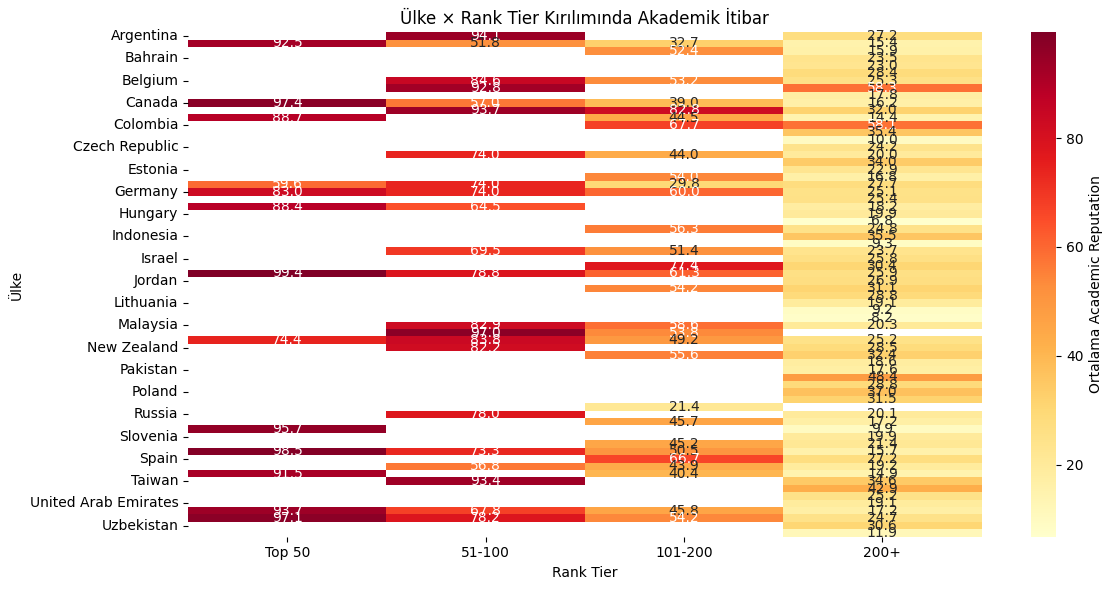

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(
    pivot,
    annot=True, fmt='.1f',
    cmap='YlOrRd',
    cbar_kws={'label':'Ortalama Academic Reputation'}
)
plt.title('Ülke × Rank Tier Kırılımında Akademik İtibar')
plt.xlabel('Rank Tier')
plt.ylabel('Ülke')
plt.tight_layout()
plt.show()